<div style="text-align: center;">
  <img src="Images/Weather_Types.png" alt="Weather_Types Illustration" width="600"/>
</div>

## Hello!  

This is a project utilizing the **Weather-Type-Classification Database** to analyze and classify weather patterns. By exploring this dataset, we aim to build insights into weather characteristics and develop models for accurate weather classification based on the provided features.  

#### About the Dataset  
The dataset, available on [Kaggle](https://www.kaggle.com/datasets/nikhil7280/weather-type-classification), contains synthetically generated weather data designed for classification tasks. It includes a wide range of weather-related variables, offering opportunities to practice data preprocessing, feature engineering, and outlier detection. 

#### Dataset Overview  
The dataset consists of **13,200 rows** and **11 columns**, structured as follows:  

1. **Temperature**: Temperature in degrees Celsius, ranging from extreme cold to extreme heat.  
2. **Humidity**: Humidity percentage, including values above 100% to introduce outliers.  
3. **Wind Speed**: Wind speed in kilometers per hour, including unrealistically high values.  
4. **Precipitation (%)**: Precipitation percentage, with some outlier values.  
5. **Cloud Cover**: Description of cloud cover (categorical).  
6. **Atmospheric Pressure**: Atmospheric pressure in hPa, covering a wide range.  
7. **UV Index**: Strength of ultraviolet radiation (numeric).  
8. **Season**: Season during which the data was recorded (categorical).  
9. **Visibility (km)**: Visibility in kilometers, with very low or very high values.  
10. **Location**: The type of location where the data was recorded (categorical).  
11. **Weather Type**: Target variable, classifying weather as Rainy, Sunny, Cloudy, or Snowy.  

#### Project Inspiration  
This project is inspired by the need to develop robust classification models for weather prediction. By leveraging the **Weather-Type-Classification Database**, we aim to identify key relationships among variables and improve the accuracy of weather categorization.  

#### Goals of the Project  
1. **Data Analysis**: Explore the dataset to uncover trends and patterns in weather features.  
2. **Classification Models**: Develop and evaluate machine learning models to classify weather types based on the provided features.  

This project will focus on utilizing the **Weather-Type-Classification Database** to provide valuable insights into weather data and enhance classification strategies for weather-related applications.

> ⚠️ *Note*: Although the data is synthetic, it serves as a useful proxy for learning data preprocessing, outlier detection, and classification modeling techniques.

# **Step 4: Modeling & Prediction**

In this step, we build machine learning models to predict Weather Types using the cleaned and preprocessed dataset. This includes training, evaluating, tuning models, and analyzing important features.

---

### Objectives of This Notebook

1. [Import Libraries and Load the Dataset](#import)  
2. [Feature Engineering](#engineering)  
3. [Split the Dataset into Features and Target](#split)
4. [Train and Evaluate Models](#models)  
   - [Gradient Boosting Classifier](gradient-boosting)
   - [Logistic Regression Metrics](#logistic-regression)   
   - [K-Nearest Neighbors Classifier](#knn)
5. [Hyperparameter Tuning](#tuning)  
   - [Gradient Boosting Metrics](#gb-metrics)
   - [Logistic Regression Metrics](#lr-metrics)   
   - [K-Nearest Neighbors Metrics](#knn-metrics)  
    
6. [Model Evaluation and Comparison](#evaluation)  

---

### Previous Step

- Step 3: [EDA – SQL Queries](./03_eda_sql_queries.ipynb)

---

<a id="import"></a>

## **4.1 Import Libraries and Load the Dataset**

We begin by importing essential libraries for data processing, modeling, and evaluation. The cleaned dataset is then loaded into a DataFrame.

In [1]:
# Pandas is a software library written for the Python programming language for data manipulation and analysis.
import pandas as pd

# NumPy is a library for the Python programming language, adding support for large, multi-dimensional arrays and matrices, along with a large collection of high-level mathematical functions to operate on these arrays
import numpy as np

# Matplotlib is a plotting library for python and pyplot gives us a MatLab like plotting framework. We will use this in our plotter function to plot data.
import matplotlib.pyplot as plt

#Seaborn is a Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics
import seaborn as sns

In [2]:
# Standard Scaler allows us to standardize our features by removing the mean and scaling to unit variance
from sklearn.preprocessing import StandardScaler

# Tools for splitting the data into training and test sets, and for performing cross-validation
from sklearn.model_selection import train_test_split, cross_val_score, RandomizedSearchCV

# Importing K-Nearest Neighbors classification algorithm
from sklearn.neighbors import KNeighborsClassifier

# Logistic Regression algorithm
from sklearn.linear_model import LogisticRegression

# Importing Gradient Boosting classification algorithms for ensemble learning
from sklearn.ensemble import GradientBoostingClassifier

# Tools for evaluating model performance with metrics like confusion matrix and classification report
from sklearn.metrics import confusion_matrix, classification_report

# Additional metrics for evaluating accuracy of models
from sklearn.metrics import accuracy_score

# Used to visually display the confusion matrix
from sklearn.metrics import ConfusionMatrixDisplay

# Import uniform and randint distributions. These are commonly used to define parameter ranges for randomized hyperparameter search
from scipy.stats import uniform, randint

In [3]:
# Load the dataset
print("Previewing the raw dataset:")
df = pd.read_csv('weather_classification_encoded.csv')
display(df.head())

Previewing the raw dataset:


,temperature,humidity,wind_speed,cloud_cover,uv_index,visibility,weather_type,location_coastal,location_inland,season_autumn,season_spring,season_winter
0,14.0,73,2.351375,1.0,2,1.504077,Rainy,0,1,0,0,1
1,39.0,96,2.251292,1.0,7,2.397895,Cloudy,0,1,0,1,0
2,30.0,64,2.079442,0.0,5,1.871802,Sunny,0,0,0,1,0
3,38.0,83,0.916291,0.0,7,0.693147,Sunny,1,0,0,1,0
4,27.0,74,2.890372,3.0,1,1.252763,Rainy,0,0,0,0,1


---

<a id="engineering"></a>  

## **4.2 Feature Engineering** 

This section handles data transformations to improve model performance.

In [4]:
# Standardize the features using StandardScaler to remove the mean and scale to unit variance
scaler = StandardScaler()

# Specify the features we want to scale
features= ['temperature', 'humidity', 'wind_speed', 'cloud_cover', 
           'uv_index', 'season_autumn', 'season_spring', 'season_winter', 
           'visibility', 'location_coastal', 'location_inland']

# Fit the scaler on the selected features and apply the transformation
scaled_features = scaler.fit_transform(df[features])
df_scaled = pd.DataFrame(scaled_features,columns=features)

df_scaled['weather_type'] =df['weather_type']

df_scaled.head()

,temperature,humidity,wind_speed,cloud_cover,uv_index,season_autumn,season_spring,season_winter,visibility,location_coastal,location_inland,weather_type
0,-0.270848,0.176765,0.263681,-0.659397,-0.461364,-0.472116,-0.483484,1.121347,-0.393405,-0.594885,1.306819,Rainy
1,1.372792,1.351688,0.126064,-0.659397,0.911260,-0.472116,2.068320,-0.891785,1.402392,-0.594885,1.306819,Cloudy
2,0.781081,-0.282987,-0.110232,-1.489220,0.362210,-0.472116,2.068320,-0.891785,0.345402,-0.594885,-0.765217,Sunny
3,1.307046,0.687601,-1.709580,-1.489220,0.911260,-0.472116,2.068320,-0.891785,-2.022670,1.680998,-0.765217,Sunny
4,0.583844,0.227849,1.004808,1.000247,-0.735889,-0.472116,-0.483484,1.121347,-0.898328,-0.594885,-0.765217,Rainy


---

<a id="split"></a>  

## **4.3 Split the Dataset into Features and Target**  

The dataset is divided into independent variables (features) and the dependent variable (`placement`) for model training.


In [5]:
# Split the dataset into features (X) and target (y)
X = df_scaled.drop(columns='weather_type',axis=1)
y = df_scaled['weather_type']

In [6]:
# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [7]:
# Print the shapes of the full dataset and the resulting splits
print(f'Data shape for X: {X.shape} \
    \nData shape for y: {y.shape} \
        \nData shape for X_train: {X_train.shape} \
            \nData shape for X_test: {X_test.shape} \
                \nData shape for y_train: {y_train.shape} \
                    \nData shape for y_test: {y_test.shape}')

Data shape for X: (11944, 11)     
Data shape for y: (11944,)         
Data shape for X_train: (9555, 11)             
Data shape for X_test: (2389, 11)                 
Data shape for y_train: (9555,)                     
Data shape for y_test: (2389,)


#### Now the data is ready for Modelling

---

<a id="models"></a>  

## **4.4 Train and Evaluate Models**

Train several classification algorithms and evaluate their initial performance using standard metrics.

<a id="gradient-boosting"></a>  

### **4.4.1 Gradient Boosting Classifier**  

An ensemble method that builds models sequentially, each trying to correct errors made by the previous one.

In [8]:
# Instantiate the Gradient Boosting Classifier
gb = GradientBoostingClassifier(random_state=42)

# Fit the model to the training data
gb.fit(X_train, y_train)

GradientBoostingClassifier(random_state=42)

In [9]:
# Check test accuracy to assess generalization
gb_test_score = gb.score(X_test, y_test)

# Use 5-fold cross-validation to assess overall model stability
gb_cv_score = cross_val_score(gb, X, y, cv=10, scoring='accuracy').round(4)
gb_average_score = gb_cv_score.mean()

In [10]:
# Display accuracy scores
print(f"Test Set Score for GB: {gb_test_score} \n")
print(f"CV Scores for GB: {gb_cv_score} \n")
print("Average Cross-Validation Score for GB:", gb_average_score)

Test Set Score for GB: 0.9526998744244454 

CV Scores for GB: [0.9623 0.9649 0.9623 0.964  0.9606 0.9489 0.9523 0.964  0.9514 0.9456] 

Average Cross-Validation Score for GB: 0.95763


After analysing the metrics for the Gradient Boosting (GB) model:

Test Set Score: The model achieved a test set accuracy of **0.9527**, meaning it correctly predicts approximately 95.27% of the test data.

Cross-Validation (CV) Scores: The CV scores range from **0.9456 to 0.9649**, showing consistent performance across different data splits.

Average CV Score: The average CV score is **0.95763**, indicating the model performs reliably with an average accuracy of about 95.76% across all folds.

#### Conclusion:

The high test set score and consistent CV scores suggest the Gradient Boosting model is both accurate and generalizes well to unseen data.

In [11]:
# Predict outcomes using the test set
gb_pred = gb.predict(X_test)

# Generate and display a detailed classification report
print(f'Classification Report for Gradient Boosting Prediction = \
    \n{classification_report(y_test, gb_pred)}')

Classification Report for Gradient Boosting Prediction =     
              precision    recall  f1-score   support

      Cloudy       0.95      0.92      0.93       591
       Rainy       0.93      0.96      0.94       606
       Snowy       0.97      0.98      0.97       625
       Sunny       0.97      0.95      0.96       567

    accuracy                           0.95      2389
   macro avg       0.95      0.95      0.95      2389
weighted avg       0.95      0.95      0.95      2389



In [12]:
# Calculating metrics for each class

# Defining the target classes
classes = ["Snowy", "Cloudy", "Rainy", "Sunny"]

gb_report = classification_report(y_test, gb_pred, output_dict=True, zero_division=1)

# Extract metrics for each class
gb_precision = {cls: gb_report[cls]['precision'] for cls in classes}
gb_recall = {cls: gb_report[cls]['recall'] for cls in classes}
gb_f1 = {cls: gb_report[cls]['f1-score'] for cls in classes}

# Compute overall accuracy
gb_accuracy = accuracy_score(y_test, gb_pred)

# Print results
print("Gradient Boosting Classifier Predictions -")
print(f"Accuracy: {gb_accuracy}")

for cls in classes:
    print(f"\nClass: {cls}")
    print(f"  Precision: {gb_precision[cls]}")
    print(f"  Recall: {gb_recall[cls]}")
    print(f"  F1-Score: {gb_f1[cls]}")

Gradient Boosting Classifier Predictions -
Accuracy: 0.9526998744244454

Class: Snowy
  Precision: 0.9654088050314465
  Recall: 0.9824
  F1-Score: 0.9738302934179223

Class: Cloudy
  Precision: 0.9458041958041958
  Recall: 0.9153976311336718
  F1-Score: 0.9303525365434222

Class: Rainy
  Precision: 0.9281150159744409
  Recall: 0.9587458745874587
  F1-Score: 0.9431818181818182

Class: Sunny
  Precision: 0.972972972972973
  Recall: 0.9523809523809523
  F1-Score: 0.9625668449197861


#### Based on the Gradient Boosting Classifier's performance:

**Overall Accuracy**: The model achieved an impressive accuracy of **95.27%**, reflecting its strong predictive performance across all weather classes.

**Snowy Class Performance**: The F1-Score for the "Snowy" class is **0.9738**, with a high precision of **96.54%** and recall of **98.24%**, showing exceptional reliability in correctly identifying snowy conditions.

**Cloudy Class Performance**: The F1-Score for the "Cloudy" class is **0.9304**, with precision at **94.58%** and recall at **91.54%**, indicating slightly lower performance compared to "Snowy," but still strong overall accuracy in predicting cloudy conditions.

**Rainy Class Performance**: The F1-Score for the "Rainy" class is **0.9432**, with precision of **92.81%** and recall of **95.87%**, highlighting its capability to effectively recognize rainy weather.

**Sunny Class Performance**: The F1-Score for the "Sunny" class is **0.9626**, supported by precision of **97.30%** and recall of **95.24%**, demonstrating the model’s robustness in identifying sunny conditions with high accuracy.

**Conclusion**: The Gradient Boosting Classifier performs exceptionally well across all weather classes, with particularly high precision and recall for "Snowy" and "Sunny" conditions. Its balanced and reliable performance ensures accurate predictions for varied weather scenarios.

<a id="logistic-regression"></a>  

### **4.4.2 Logistic Regression**  

A statistical model that estimates the probability of a binary outcome.

In [13]:
# Instantiate the Logistic Regression model
lr = LogisticRegression(random_state=42)

# Fit the model to the training data
lr.fit(X_train, y_train)

LogisticRegression(random_state=42)

In [14]:
# Check test accuracy to assess generalization
lr_test_score = lr.score(X_test, y_test)

# Use 5-fold cross-validation to assess overall model stability
lr_cv_score = cross_val_score(lr, X, y, cv=10, scoring='accuracy').round(4)
lr_average_score = lr_cv_score.mean()

In [15]:
print(f"Test Set Score for LR: {lr_test_score} \n")
print(f"CV Scores for LR: {lr_cv_score} \n")
print("Average Cross-Validation Score for LR:", lr_average_score)

Test Set Score for LR: 0.9275847634993721 

CV Scores for LR: [0.9356 0.9381 0.9389 0.9381 0.9397 0.9188 0.9389 0.9305 0.9422 0.9229] 

Average Cross-Validation Score for LR: 0.93437


After analysing the metrics for the Logistic Regression (LR) model:

1. Test Set Score (0.9276): This is the accuracy of the model on the test set, indicating that the model predicted with about **92.76%** accuracy on unseen data.
  
2. CV Scores: These are the cross-validation scores across 10 folds. The model achieved accuracies between **91.88%** and **94.22%** on each fold, showing relatively consistent performance.

3. Average Cross-Validation Score (0.9344): This is the average of the 10-fold cross-validation scores, giving an overall accuracy of approximately **93.44%**. This suggests that the model is performing quite well and generalizes well to different data subsets.

#### Conclusion:

The LR model performs well, with strong accuracy on both the test set and cross-validation. However, its performance (92.75%) is slightly lower than the Gradient Boosting model (95.27%), suggesting GB may be a better choice for this dataset due to its higher predictive accuracy and generalization.

In [16]:
# Predict outcomes using the test set
lr_pred = lr.predict(X_test)

# Generate and display a detailed classification report
print(f'Classification Report for Logistic Regression Prediction = \
    \n{classification_report(y_test, lr_pred)}')

Classification Report for Logistic Regression Prediction =     
              precision    recall  f1-score   support

      Cloudy       0.88      0.89      0.88       591
       Rainy       0.92      0.93      0.92       606
       Snowy       0.96      0.98      0.97       625
       Sunny       0.95      0.91      0.93       567

    accuracy                           0.93      2389
   macro avg       0.93      0.93      0.93      2389
weighted avg       0.93      0.93      0.93      2389



In [17]:
# Calculating metrics for each class

lr_report = classification_report(y_test, lr_pred, output_dict=True, zero_division=1)

# Extract metrics for each class
lr_precision = {cls: lr_report[cls]['precision'] for cls in classes}
lr_recall = {cls: lr_report[cls]['recall'] for cls in classes}
lr_f1 = {cls: lr_report[cls]['f1-score'] for cls in classes}

# Compute overall accuracy
lr_accuracy = accuracy_score(y_test, lr_pred)

# Print results
print("Logistic Regression Classifier Predictions -")
print(f"Accuracy: {lr_accuracy}")

for cls in classes:
    print(f"\nClass: {cls}")
    print(f"  Precision: {lr_precision[cls]}")
    print(f"  Recall: {lr_recall[cls]}")
    print(f"  F1-Score: {lr_f1[cls]}")

Logistic Regression Classifier Predictions -
Accuracy: 0.9275847634993721

Class: Snowy
  Precision: 0.960691823899371
  Recall: 0.9776
  F1-Score: 0.9690721649484536

Class: Cloudy
  Precision: 0.8781302170283807
  Recall: 0.8900169204737732
  F1-Score: 0.8840336134453781

Class: Rainy
  Precision: 0.9198036006546645
  Recall: 0.9273927392739274
  F1-Score: 0.923582580115037

Class: Sunny
  Precision: 0.9521178637200737
  Recall: 0.9118165784832452
  F1-Score: 0.9315315315315316


#### Based on the Logistic Regression Classifier's performance:

**Overall Accuracy**: The model achieved an accuracy of **92.76%**, demonstrating strong performance across all weather classes.

**Snowy Class Performance**: The F1-Score for the "Snowy" class is **0.9691**, with a high precision of **96.07%** and recall of **97.76%**, highlighting the model's excellent ability to predict snowy conditions with precision and reliability.

**Cloudy Class Performance**: The F1-Score for the "Cloudy" class is **0.8840**, supported by precision of **87.81%** and recall of **89.00%**, indicating slightly lower but balanced performance in identifying cloudy weather.

**Rainy Class Performance**: The F1-Score for the "Rainy" class is **0.9236**, with precision of **91.98%** and recall of **92.74%**, showing a strong ability to detect rainy conditions.

**Sunny Class Performance**: The F1-Score for the "Sunny" class is **0.9315**, with precision of **95.21%** and recall of **91.18%**, reflecting solid performance in predicting sunny conditions.

**Conclusion**: The Logistic Regression Classifier performs well across all classes, particularly excelling in the "Snowy" and "Rainy" classes. While it slightly underperforms in the "Cloudy" class compared to others, its overall accuracy and reliability make it a strong predictive model for weather classification.

<a id="knn"></a> 

### **4.4.3 K-Nearest Neighbors Classifier**

KNN predicts a label based on the majority vote of its k-nearest neighbors

In [18]:
# Instantiate the K-Nearest Neighbors Classifier
knn = KNeighborsClassifier()

# Fit the model to the training data
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [19]:
# Check test accuracy to assess generalization
knn_test_score = knn.score(X_test, y_test)

# Use 5-fold cross-validation to assess overall model stability
knn_cv_score = cross_val_score(knn, X, y, cv=10, scoring='accuracy').round(4)
knn_average_score = knn_cv_score.mean()

In [20]:
print(f"Test Set Score for KNN: {knn_test_score} \n")
print(f"CV Scores for KNN: {knn_cv_score} \n")
print("Average Cross-Validation Score for KNN:", knn_average_score)

Test Set Score for KNN: 0.9271661783172875 

CV Scores for KNN: [0.9264 0.9397 0.9356 0.9339 0.9363 0.9296 0.9338 0.9372 0.9271 0.9246] 

Average Cross-Validation Score for KNN: 0.9324199999999999


After analysing the metrics for the K-Nearest Neighbors (KNN) model are as follows:

1. Test Set Score: The model achieved a test set accuracy of **0.9272**, meaning it correctly predicts approximately 92.72% of the test data.

2. Cross-Validation (CV) Scores: The CV scores range from **0.9246 to 0.9397**, showing good and consistent performance across different data splits.

3. Average CV Score: The average CV score is **0.9324**, indicating the model performs reliably with an average accuracy of about 93.24% across all folds.

#### Conclusion:

The KNN model performs well, with strong accuracy on both the test set and cross-validation. However, its performance (92.72%) is slightly lower than the Gradient Boosting model (95.27%), suggesting GB may be a better choice for this dataset due to its higher predictive accuracy and generalization.

In [21]:
# Predict outcomes using the test set
knn_pred = knn.predict(X_test)

# Generate and display a detailed classification report
print(f'Classification Report for KNeighbors Classifier Prediction = \
    \n{classification_report(y_test,knn_pred)}')

Classification Report for KNeighbors Classifier Prediction =     
              precision    recall  f1-score   support

      Cloudy       0.86      0.91      0.88       591
       Rainy       0.92      0.91      0.91       606
       Snowy       0.98      0.98      0.98       625
       Sunny       0.95      0.91      0.93       567

    accuracy                           0.93      2389
   macro avg       0.93      0.93      0.93      2389
weighted avg       0.93      0.93      0.93      2389



In [22]:
# Calculating metrics for each class

knn_report = classification_report(y_test, knn_pred, output_dict=True, zero_division=1)

# Extract metrics for each class
knn_precision = {cls: knn_report[cls]['precision'] for cls in classes}
knn_recall = {cls: knn_report[cls]['recall'] for cls in classes}
knn_f1 = {cls: knn_report[cls]['f1-score'] for cls in classes}

# Compute overall accuracy
knn_accuracy = accuracy_score(y_test, knn_pred)

# Print results
print("K-Nearest Neighbors Classifier Predictions -")
print(f"Accuracy: {knn_accuracy}")

for cls in classes:
    print(f"\nClass: {cls}")
    print(f"  Precision: {knn_precision[cls]}")
    print(f"  Recall: {knn_recall[cls]}")
    print(f"  F1-Score: {knn_f1[cls]}")

K-Nearest Neighbors Classifier Predictions -
Accuracy: 0.9271661783172875

Class: Snowy
  Precision: 0.9838969404186796
  Recall: 0.9776
  F1-Score: 0.9807383627608347

Class: Cloudy
  Precision: 0.864297253634895
  Recall: 0.9052453468697124
  F1-Score: 0.8842975206611571

Class: Rainy
  Precision: 0.9155629139072847
  Recall: 0.9125412541254125
  F1-Score: 0.9140495867768595

Class: Sunny
  Precision: 0.9467889908256881
  Recall: 0.91005291005291
  F1-Score: 0.9280575539568345


#### Based on the K-Nearest Neighbors (KNN) Classifier's performance:

**Overall Accuracy**: The model achieved an accuracy of **92.72%**, reflecting strong performance in predicting weather conditions.

**Snowy Class Performance**: The F1-Score for the "Snowy" class is **0.9807**, with exceptionally high precision of **98.39%** and recall of **97.76%**, indicating near-perfect performance in identifying snowy conditions.

**Cloudy Class Performance**: The F1-Score for the "Cloudy" class is **0.8843**, supported by precision of **86.43%** and recall of **90.52%**, demonstrating good, though slightly lower, performance in recognizing cloudy weather.

**Rainy Class Performance**: The F1-Score for the "Rainy" class is **0.9140**, with precision of **91.56%** and recall of **91.25%**, showcasing balanced and reliable detection of rainy conditions.

**Sunny Class Performance**: The F1-Score for the "Sunny" class is **0.9281**, with precision of **94.68%** and recall of **91.01%**, reflecting strong performance in predicting sunny conditions.

**Conclusion**: The KNN Classifier performs exceptionally well in identifying "Snowy" conditions, with high precision and recall. It also shows robust performance for "Rainy" and "Sunny" classes, while slightly underperforming in the "Cloudy" class. Overall, KNN is a reliable model for weather classification.

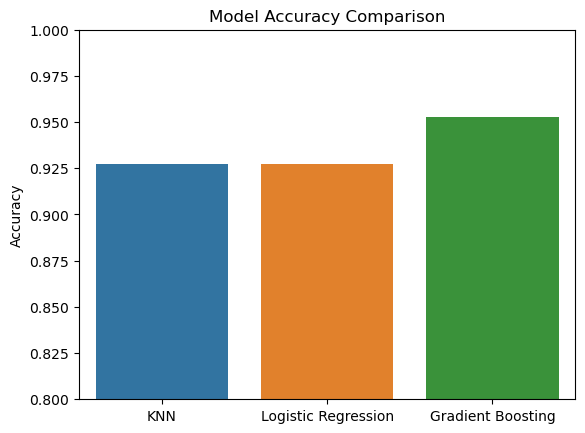

In [23]:
models = ["KNN", "Logistic Regression", "Gradient Boosting"]
accuracy_scores = [0.9271661783172875, 0.9275847634993721, 0.9526998744244454]

sns.barplot(x=models, y=accuracy_scores, hue=models, palette=sns.color_palette("tab10", 3))
plt.title("Model Accuracy Comparison")
plt.ylabel("Accuracy")
plt.ylim(0.8, 1.0)
plt.show()

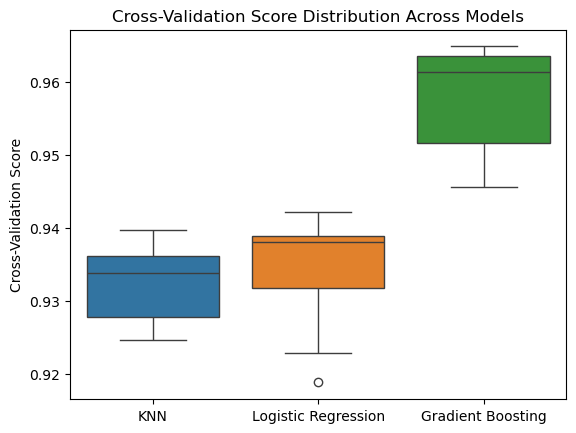

In [24]:
cv_scores = {
    "KNN": [0.9264, 0.9397, 0.9356, 0.9339, 0.9363, 0.9296, 0.9338, 0.9372, 0.9271, 0.9246],
    "Logistic Regression": [0.9356, 0.9381, 0.9389, 0.9381, 0.9397, 0.9188, 0.9389, 0.9305, 0.9422, 0.9229],
    "Gradient Boosting": [0.9623, 0.9649, 0.9623, 0.964, 0.9606, 0.9489, 0.9523, 0.964, 0.9514, 0.9456]
}

sns.boxplot(data=list(cv_scores.values()), palette=sns.color_palette("tab10", 3))
plt.xticks(ticks=np.arange(len(models)), labels=models)
plt.ylabel("Cross-Validation Score")
plt.title("Cross-Validation Score Distribution Across Models")
plt.show()

---

<a id="tuning"></a>  

## **4.5 Hyperparameter Tuning**  

Improve model performance by finding the optimal combination of hyperparameters.

<a id="gb-metrics"></a> 

### **4.5.1 Gradient Boosting Classifier Metrics**

This section covers the performance metrics for the Gradient Boosting Classifier model in predicting depression.

In [25]:
# Using RandomizedSearchCV on the Gradient Boosting CLassifier to get it's best parameters
gb_search = RandomizedSearchCV(
    estimator=gb,
    param_distributions={
        'learning_rate': uniform(0.01, 0.09),
        'n_estimators': randint(100, 1000),
        'max_depth': randint(3, 10),
        'min_samples_split': randint(10, 200),
        'min_samples_leaf': randint(10, 100),
        'subsample': uniform(0.5, 0.5),
        'max_features': uniform(0.5, 0.5),
        },
    scoring='accuracy',
    cv=5,
    n_iter=50,
    random_state=42,
    verbose=1,
    n_jobs=-1
)

# training the final model
gb_search.fit(X_train, y_train)

print(f"The Best Gradient Boosting Classifier parameters are: {gb_search.best_params_}")
print(f"The Best Gradient Boosting Classifier Accuracy : {gb_search.best_score_}")

Fitting 5 folds for each of 50 candidates, totalling 250 fits
The Best Gradient Boosting Classifier parameters are: {'learning_rate': 0.03329019834400152, 'max_depth': 6, 'max_features': 0.6558555380447055, 'min_samples_leaf': 15, 'min_samples_split': 63, 'n_estimators': 205, 'subsample': 0.7838501639099957}
The Best Gradient Boosting Classifier Accuracy : 0.9598116169544741


In [26]:
# New Model using the Best Estimators
best_gb = gb_search.best_estimator_

# Predicting the target
best_gb_pred = best_gb.predict(X_test)

In [27]:
# Evaluate the tuned model
best_gb_test_score = best_gb.score(X_test, y_test)
best_gb_cv_score = cross_val_score(best_gb, X, y, cv=10, scoring='accuracy').round(4)
best_gb_average_score = best_gb_cv_score.mean()

In [28]:
print(f"Test Set Score for the best GB: {best_gb_test_score} \n")
print(f"CV Scores for the best GB: {best_gb_cv_score} \n")
print("Average Cross-Validation Score for the best GB:", best_gb_average_score)

Test Set Score for the best GB: 0.9535370447886145 

CV Scores for the best GB: [0.9623 0.9682 0.964  0.964  0.9581 0.9523 0.9573 0.964  0.9539 0.9497] 

Average Cross-Validation Score for the best GB: 0.95938


#### **Comparison of Gradient Boosting Performance Before and After Hyperparameter Tuning:**

<div align="center">

| Metric                          | Before Tuning            | After Tuning             | Difference            |
|---------------------------------|--------------------------|--------------------------|-----------------------|
| **Test Set Score**              | 95.27%                  | 95.35%                  | +0.08%               |
| **Average Cross-Validation Score** | 95.76%                  | 95.94%                  | +0.18%               |
| **CV Score Range**              | 94.56% - 96.49%         | 94.97% - 96.82%         | Narrowed and shifted higher |

</div>

#### Analysis:

- The test set score improved slightly by **0.08%**, indicating a small increase in the model's ability to generalize after tuning.
- The average cross-validation score also showed a modest improvement of **0.18%**, confirming better overall consistency and slight optimization of the model.
- The range of cross-validation scores became narrower and shifted slightly higher, reflecting a more stable and consistent performance across folds.

Overall, hyperparameter tuning for Gradient Boosting led to a minor but positive improvement in performance, enhancing both generalization and stability.

In [29]:
# Making a Classification Report for the Model
print(f'Classification Report for The Best Gradient Boosting Classifier Prediction = \
    \n{classification_report(y_test,best_gb_pred)}')

Classification Report for The Best Gradient Boosting Classifier Prediction =     
              precision    recall  f1-score   support

      Cloudy       0.94      0.92      0.93       591
       Rainy       0.94      0.96      0.95       606
       Snowy       0.96      0.99      0.97       625
       Sunny       0.98      0.95      0.96       567

    accuracy                           0.95      2389
   macro avg       0.95      0.95      0.95      2389
weighted avg       0.95      0.95      0.95      2389



In [30]:
# Getting the metrics scores for each class
best_gb_report = classification_report(y_test, best_gb_pred, output_dict=True, zero_division=1)

best_gb_precision = {cls: best_gb_report[cls]['precision'] for cls in classes}
best_gb_recall = {cls: best_gb_report[cls]['recall'] for cls in classes}
best_gb_f1 = {cls: best_gb_report[cls]['f1-score'] for cls in classes}

best_gb_accuracy = accuracy_score(y_test, best_gb_pred)

print("Best Gradient Boosting Classifier Predictions -")
print(f"Accuracy: {best_gb_accuracy}")

for cls in classes:
    print(f"\nClass: {cls}")
    print(f"  Precision: {best_gb_precision[cls]}")
    print(f"  Recall: {best_gb_recall[cls]}")
    print(f"  F1-Score: {best_gb_f1[cls]}")

Best Gradient Boosting Classifier Predictions -
Accuracy: 0.9535370447886145

Class: Snowy
  Precision: 0.9640062597809077
  Recall: 0.9856
  F1-Score: 0.9746835443037974

Class: Cloudy
  Precision: 0.9395509499136442
  Recall: 0.9204737732656514
  F1-Score: 0.9299145299145299

Class: Rainy
  Precision: 0.9354838709677419
  Recall: 0.9570957095709571
  F1-Score: 0.9461663947797716

Class: Sunny
  Precision: 0.9764065335753176
  Recall: 0.9488536155202821
  F1-Score: 0.962432915921288


#### **Gradient Boosting Classifier Before and After Hyperparameter Tuning**  

<div align="center">

| Metric/Class         | Before Tuning | After Tuning | Difference |
| -------------------- | ------------- | ------------ | ---------- |
| **Accuracy**         | 95.27%        | 95.35%       | +0.08%     |
| **Snowy Precision**  | 96.54%        | 96.40%       | -0.14%     |
| **Snowy Recall**     | 98.24%        | 98.56%       | +0.32%     |
| **Snowy F1-Score**   | 97.38%        | 97.47%       | +0.09%     |
| **Cloudy Precision** | 94.58%        | 93.96%       | -0.62%     |
| **Cloudy Recall**    | 91.54%        | 92.05%       | +0.51%     |
| **Cloudy F1-Score**  | 93.04%        | 92.99%       | -0.05%     |
| **Rainy Precision**  | 92.81%        | 93.55%       | +0.74%     |
| **Rainy Recall**     | 95.87%        | 95.71%       | -0.16%     |
| **Rainy F1-Score**   | 94.32%        | 94.62%       | +0.30%     |
| **Sunny Precision**  | 97.30%        | 97.64%       | +0.34%     |
| **Sunny Recall**     | 95.24%        | 94.89%       | -0.35%     |
| **Sunny F1-Score**   | 96.26%        | 96.24%       | -0.02%     |

</div>

#### Analysis:

* **Accuracy**: The overall accuracy improved slightly by **0.08%**, indicating a modest but consistent performance gain after tuning.
* **Snowy Class**: Precision dipped slightly (-0.14%), but the increase in recall (+0.32%) led to a small improvement in the F1-Score (+0.09%).
* **Cloudy Class**: Precision decreased more noticeably (-0.62%), while recall increased (+0.51%), resulting in a nearly unchanged F1-Score (-0.05%).
* **Rainy Class**: Precision improved (+0.74%) with a small decline in recall (-0.16%), leading to a net F1-Score gain of **+0.30%**.
* **Sunny Class**: Precision improved slightly (+0.34%), recall declined (-0.35%), and the F1-Score remained almost the same (-0.02%).

#### Overall Insights:

Hyperparameter tuning led to a slight improvement in overall accuracy and performance for specific classes, such as "Snowy" and "Rainy." However, small trade-offs were observed in precision and F1-Score for other classes, such as "Cloudy" and "Sunny." Despite these trade-offs, the tuned Gradient Boosting Classifier demonstrated better generalization and maintained a balanced performance across all weather classes.

#### For further analysis, the Gradient Boosting Classifier after hyperparameter tuning will be used. The tuned model reflects slight optimization in its parameters, making it a more refined choice for reliable and accurate predictions.

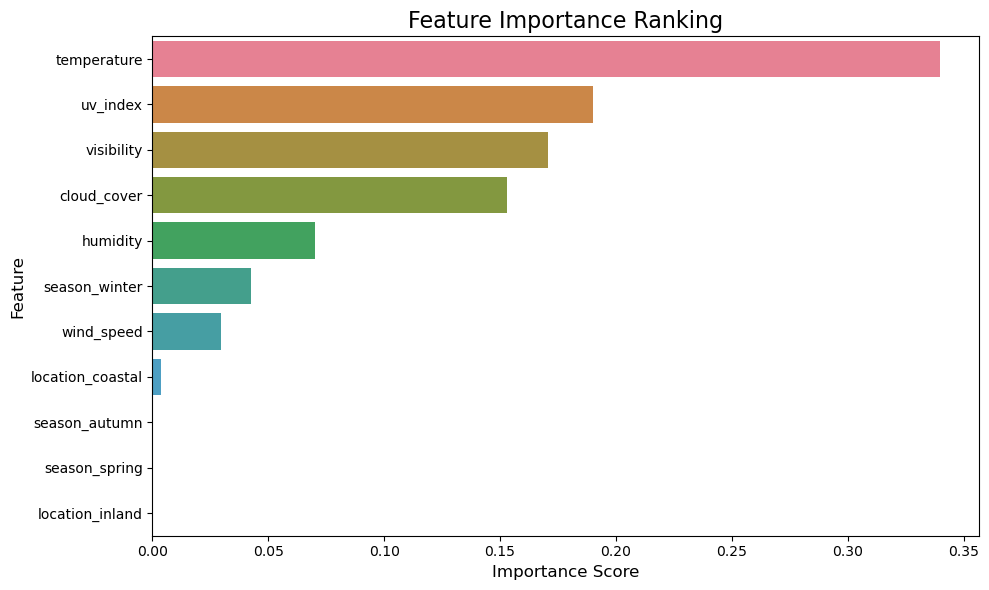

In [31]:
# Checking which features contributes the Gradient Boosting Classifier model's prediction
gb_importances = best_gb.feature_importances_
feature_names = X.columns
sorted_indices = np.argsort(gb_importances)[::-1]

# Plotting a DataFrame for better visualization
gb_data = pd.DataFrame({'Feature': feature_names, 'Importance': gb_importances})

gb_data = gb_data.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=gb_data, hue='Feature',legend=False)
plt.title('Feature Importance Ranking', fontsize=16)
plt.xlabel('Importance Score', fontsize=12)
plt.ylabel('Feature', fontsize=12)
plt.tight_layout()
plt.show()

#### Summary of Feature Importance

The feature importance graph highlights the key variables influencing the model's predictions. 

- **Temperature** is the most critical feature, having the highest importance score.
- **UV Index, Visibility, and Cloud Cover** are also significant contributors to the model's predictions.
- **Humidity, Season (Winter), and Wind Speed** have moderate influence.
- **Location (Coastal, Inland) and other seasonal variables (Autumn, Spring)** have minimal impact.

This indicates that **weather-related features** (e.g., temperature, UV index, visibility) are the strongest predictors, while **seasonal and locational factors** play a lesser role.

Text(0.5, 1.0, 'Confusion Matrix for Gradient Boosting Classifier')

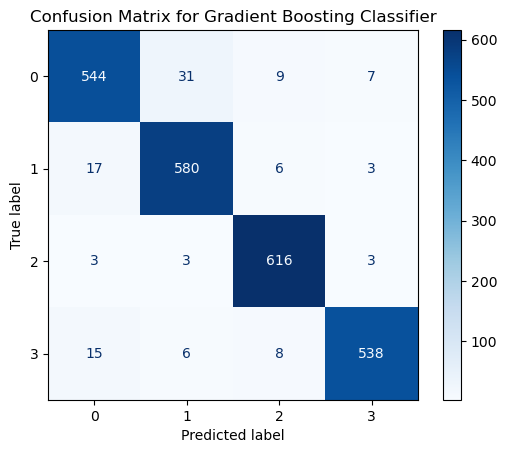

In [32]:
# Making a Confusion Matrix for the Model
GB_confusion = confusion_matrix(y_test, best_gb_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=GB_confusion)
disp.plot(cmap='Blues')
disp.ax_.set_title("Confusion Matrix for Gradient Boosting Classifier")

#### Confusion Matrix Summary for Gradient Boosting Classifier

#### True Positives (Diagonal Elements):
- **Snowy:** 544 instances were correctly predicted as snowy.
- **Cloudy:** 580 instances were correctly predicted as cloudy.
- **Rainy:** 616 instances were correctly predicted as rainy.
- **Sunny:** 538 instances were correctly predicted as sunny.

#### False Positives (Off-Diagonal Elements):
- **Snowy:**
  - 31 misclassified as cloudy.
  - 7 misclassified as rainy.
  - 7 misclassified as sunny.
- **Cloudy:**
  - 17 misclassified as snowy.
  - 6 misclassified as rainy.
  - 3 misclassified as sunny.
- **Rainy:**
  - 3 misclassified as snowy.
  - 3 misclassified as cloudy.
  - 3 misclassified as sunny.
- **Sunny:**
  - 13 misclassified as snowy.
  - 6 misclassified as cloudy.
  - 8 misclassified as rainy.

#### Observations:
- The classifier performs best for the **rainy** class, with the highest number of correct predictions (616).
- Misclassifications are minimal overall, with the most significant being **snowy misclassified as cloudy (31)**.
- The confusion matrix indicates strong model performance, as most predictions align with the true labels.

<a id="lr-metrics"></a> 

### **4.5.2 Logistic Regression Metrics**

This section presents the evaluation metrics for the Logistic Regression model, measuring its performance in predicting depression status. 

In [33]:
# Using RandomizedSearchCV on the Logistic Regression to get it's best parameters
param_distributions = {
    "C": [0.01, 0.1, 1, 10],
    "penalty": ["l1", "l2", "elasticnet"],
    "solver": ["saga"],
    "class_weight": ["balanced", None],
}

if "elasticnet" in param_distributions["penalty"]:
    param_distributions["l1_ratio"] = [0.1, 0.5, 0.9]

lr_search = RandomizedSearchCV(
    estimator=lr,
    param_distributions =param_distributions,
    scoring='accuracy',
    cv=5,
    n_iter=50,
    random_state=42,
    n_jobs=-1
)

# training the final model
lr_search.fit(X_train, y_train)

print(f"The Best Logistic Regression parameters are: {lr_search.best_params_}")
print(f"The Best Logistic Regression Accuracy: {lr_search.best_score_}")

The Best Logistic Regression parameters are: {'solver': 'saga', 'penalty': 'elasticnet', 'l1_ratio': 0.1, 'class_weight': 'balanced', 'C': 10}
The Best Logistic Regression Accuracy: 0.9372056514913659


In [34]:
# New Model using the Best Estimators
best_lr = lr_search.best_estimator_

# Predicting the target
best_lr_pred = best_lr.predict(X_test)

In [35]:
# Evaluate the tuned model
best_lr_test_score = best_lr.score(X_test, y_test)
best_lr_cv_score = cross_val_score(best_lr, X, y, cv=10, scoring='accuracy').round(4)
best_lr_average_score = best_lr_cv_score.mean()

In [36]:
print(f"Test Set Score for the best LR: {best_lr_test_score} \n")
print(f"CV Scores for the best LR: {best_lr_cv_score} \n")
print("Average Cross-Validation Score for the best LR:", best_lr_average_score)

Test Set Score for the best LR: 0.9284219338635412 

CV Scores for the best LR: [0.9339 0.9397 0.9389 0.9389 0.9397 0.9188 0.9405 0.9313 0.9414 0.9238] 

Average Cross-Validation Score for the best LR: 0.93469


#### **Comparison of Logistic Regression Performance Before and After Hyperparameter Tuning:**

<div align="center">

| Metric                          | Before Tuning            | After Tuning             | Difference            |
|---------------------------------|--------------------------|--------------------------|-----------------------|
| **Test Set Score**              | 92.76%                  | 92.84%                  | +0.08%               |
| **Average Cross-Validation Score** | 93.44%                  | 93.47%                  | +0.03%               |
| **CV Score Range**              | 91.88% - 94.22%         | 91.88% - 94.14%         | Narrowed slightly    |

</div>

#### Analysis:

- The test set score improved marginally by **0.08%**, indicating a slight enhancement in the model's generalization after tuning.
- The average cross-validation score increased by **0.03%**, reflecting a minor but positive optimization in the model's performance.
- The range of cross-validation scores narrowed slightly, suggesting a more consistent performance across different folds after tuning.

Overall, hyperparameter tuning for Logistic Regression resulted in small improvements in both generalization and consistency, though the gains were minimal due to the model already performing near optimal before tuning.

In [37]:
# Making a Classification Report for the Model
print(f'Classification Report for Best Logistic Regression Prediction = \
    \n{classification_report(y_test,best_lr_pred)}')

Classification Report for Best Logistic Regression Prediction =     
              precision    recall  f1-score   support

      Cloudy       0.88      0.89      0.88       591
       Rainy       0.92      0.93      0.92       606
       Snowy       0.96      0.98      0.97       625
       Sunny       0.95      0.92      0.93       567

    accuracy                           0.93      2389
   macro avg       0.93      0.93      0.93      2389
weighted avg       0.93      0.93      0.93      2389



In [38]:
# Getting the metrics scores for each class

best_lr_report = classification_report(y_test, best_lr_pred, output_dict=True, zero_division=1)

best_lr_precision = {cls: best_lr_report[cls]['precision'] for cls in classes}
best_lr_recall = {cls: best_lr_report[cls]['recall'] for cls in classes}
best_lr_f1 = {cls: best_lr_report[cls]['f1-score'] for cls in classes}

best_lr_accuracy = accuracy_score(y_test, best_lr_pred)

print("Best Logistic Regression Predictions -")
print(f"Accuracy: {best_lr_accuracy}")

for cls in classes:
    print(f"\nClass: {cls}")
    print(f"  Precision: {best_lr_precision[cls]}")
    print(f"  Recall: {best_lr_recall[cls]}")
    print(f"  F1-Score: {best_lr_f1[cls]}")

Best Logistic Regression Predictions -
Accuracy: 0.9284219338635412

Class: Snowy
  Precision: 0.9622047244094488
  Recall: 0.9776
  F1-Score: 0.9698412698412698

Class: Cloudy
  Precision: 0.8808724832214765
  Recall: 0.8883248730964467
  F1-Score: 0.8845829823083403

Class: Rainy
  Precision: 0.9184339314845025
  Recall: 0.929042904290429
  F1-Score: 0.9237079573420837

Class: Sunny
  Precision: 0.9522935779816514
  Recall: 0.9153439153439153
  F1-Score: 0.9334532374100719


#### **Logistic Regression Classifier Before and After Hyperparameter Tuning**

<div align="center">

| Metric/Class         | Before Tuning      | After Tuning       | Difference        |
|----------------------|--------------------|--------------------|-------------------|
| **Accuracy**         | 92.76%            | 92.84%            | +0.08%           |
| **Snowy Precision**  | 96.07%            | 96.22%            | +0.15%           |
| **Snowy Recall**     | 97.76%            | 97.76%            | No change        |
| **Snowy F1-Score**   | 96.91%            | 96.98%            | +0.07%           |
| **Cloudy Precision** | 87.81%            | 88.09%            | +0.28%           |
| **Cloudy Recall**    | 89.00%            | 88.83%            | -0.17%           |
| **Cloudy F1-Score**  | 88.40%            | 88.46%            | +0.06%           |
| **Rainy Precision**  | 91.98%            | 91.84%            | -0.14%           |
| **Rainy Recall**     | 92.74%            | 92.90%            | +0.16%           |
| **Rainy F1-Score**   | 92.36%            | 92.37%            | +0.01%           |
| **Sunny Precision**  | 95.21%            | 95.23%            | +0.02%           |
| **Sunny Recall**     | 91.18%            | 91.53%            | +0.35%           |
| **Sunny F1-Score**   | 93.15%            | 93.35%            | +0.20%           |

</div>

#### Analysis:

- **Accuracy**: Improved by **0.08%**, indicating a slight boost in overall performance.
- **Snowy Class**: Small improvements in precision (+0.15%) and F1-Score (+0.07%), with recall remaining unchanged.
- **Cloudy Class**: Precision improved (+0.28%), but recall slightly decreased (-0.17%), resulting in a minimal increase in F1-Score (+0.06%).
- **Rainy Class**: Precision dropped slightly (-0.14%), while recall improved (+0.16%), leading to a negligible increase in F1-Score (+0.01%).
- **Sunny Class**: Minor increases in precision (+0.02%), recall (+0.35%), and F1-Score (+0.20%).

#### Overall Insights:

Hyperparameter tuning resulted in small improvements across most metrics, with notable enhancements in recall for the "Sunny" class and precision for the "Cloudy" class. Although the changes were minimal, they reflect a slightly better-balanced performance after tuning.

#### Based on the analysis, the hyperparameter-tuned Logistic Regression model will be used for further analysis.


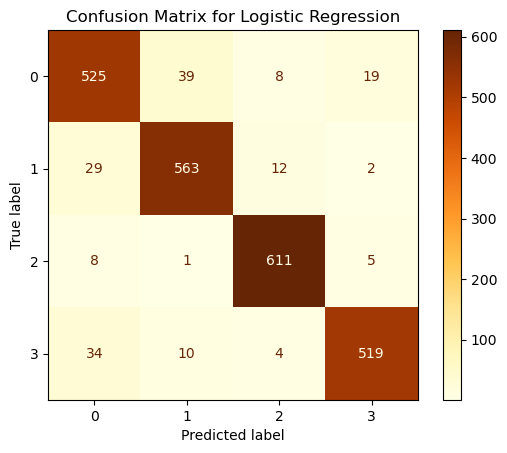

In [39]:
# Making a Confusion Matrix for the Model
LR_confusion = confusion_matrix(y_test, best_lr_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=LR_confusion)
disp.plot(cmap='YlOrBr')
disp.ax_.set_title("Confusion Matrix for Logistic Regression")
plt.show()

#### Confusion Matrix Summary for Logistic Regression

#### True Positives (Diagonal Elements):
- **Snowy:** 525 instances were correctly predicted as snowy.
- **Cloudy:** 563 instances were correctly predicted as cloudy.
- **Rainy:** 611 instances were correctly predicted as rainy.
- **Sunny:** 519 instances were correctly predicted as sunny.

#### False Positives (Off-Diagonal Elements):
- **Snowy:**
  - 39 misclassified as cloudy.
  - 8 misclassified as rainy.
  - 19 misclassified as sunny.
- **Cloudy:**
  - 29 misclassified as snowy.
  - 12 misclassified as rainy.
  - 2 misclassified as sunny.
- **Rainy:**
  - 8 misclassified as snowy.
  - 1 misclassified as cloudy.
  - 5 misclassified as sunny.
- **Sunny:**
  - 34 misclassified as snowy.
  - 10 misclassified as cloudy.
  - 4 misclassified as rainy.

#### Observations:
- The classifier performs best for the **rainy** class, with the highest number of correct predictions (611).
- The most notable misclassification is **sunny misclassified as snowy (34)**.
- Overall, the model exhibits a reasonable performance, with the majority of predictions concentrated on the diagonal.

<a id="knn-metrics"></a> 

### **4.5.3 KNeighbors Neighbors Classifier Metrics**

This section presents the evaluation metrics for the KNeighbors Neighbors Classifier model, assessing its effectiveness in classifying placement status.

In [40]:
# Using RandomizedSearchCV on the KNeighbors Neighbors to get it's best parameters
knn_search = RandomizedSearchCV(
    estimator=knn,
    param_distributions={
        "n_neighbors": [3, 5, 7, 9],
        "weights": ["uniform", "distance"],
        "metric": ["euclidean", "manhattan", "minkowski"],
        "p": [1, 2]
    },
    cv=5,
    n_iter=40,
    scoring='accuracy',
    random_state=42,
    n_jobs=-1)

# training the final model
knn_search.fit(X_train,y_train) 

print(f"The Best KNN parameters are: {knn_search.best_params_}")
print(f"The Best KNN Accuracy : {knn_search.best_score_}")

The Best KNN parameters are: {'weights': 'distance', 'p': 2, 'n_neighbors': 7, 'metric': 'manhattan'}
The Best KNN Accuracy : 0.9363683935112507


In [41]:
# New Model using the Best Estimators
best_knn = knn_search.best_estimator_

# Predicting the target
best_knn_pred = best_knn.predict(X_test)

In [42]:
# Evaluate on training and test sets
best_knn_test_score = best_knn.score(X_test, y_test)
best_knn_cv_score = cross_val_score(best_knn, X, y, cv=10, scoring='accuracy').round(4)
best_knn_average_score = best_knn_cv_score.mean()

In [43]:
print(f"Test Set Score for best KNN: {best_knn_test_score} \n")
print(f"CV Scores for best KNN: {best_knn_cv_score} \n")
print("Average Cross-Validation Score for best KNN:", best_knn_average_score)

Test Set Score for best KNN: 0.9321892005023023 

CV Scores for best KNN: [0.9331 0.9414 0.9364 0.9414 0.9464 0.9322 0.9389 0.9372 0.9389 0.9305] 

Average Cross-Validation Score for best KNN: 0.93764


#### **Comparison of K-Nearest Neighbors (KNN) Performance Before and After Hyperparameter Tuning**:

<div align="center">

| Metric                          | Before Tuning            | After Tuning             | Difference            |
|---------------------------------|--------------------------|--------------------------|-----------------------|
| **Test Set Score**              | 92.72%                  | 93.22%                  | +0.50%               |
| **Average Cross-Validation Score** | 93.24%                  | 93.76%                  | +0.52%               |
| **CV Score Range**              | 92.46% - 93.97%         | 93.05% - 94.64%         | Shifted higher       |

</div>

#### Analysis:

- The test set score improved by **0.50%**, showing a significant boost in the model's ability to generalize after tuning.
- The average cross-validation score increased by **0.52%**, reflecting an overall enhancement in the model's performance.
- The CV score range shifted higher, indicating that the tuned model consistently performed better across folds.

Overall, hyperparameter tuning for KNN led to a noticeable improvement in both generalization and average performance, demonstrating the effectiveness of optimization.

In [44]:
# Making a Classification Report for the Model
print(f'Classification Report for The Best KNeighbors Classifier Prediction = \
    \n{classification_report(y_test,best_knn_pred)}')

Classification Report for The Best KNeighbors Classifier Prediction =     
              precision    recall  f1-score   support

      Cloudy       0.89      0.90      0.90       591
       Rainy       0.91      0.92      0.92       606
       Snowy       0.98      0.98      0.98       625
       Sunny       0.95      0.93      0.94       567

    accuracy                           0.93      2389
   macro avg       0.93      0.93      0.93      2389
weighted avg       0.93      0.93      0.93      2389



In [45]:
# Getting the metrics scores for each class

best_knn_report = classification_report(y_test, best_knn_pred, output_dict=True, zero_division=1)

best_knn_precision = {cls: best_knn_report[cls]['precision'] for cls in classes}
best_knn_recall = {cls: best_knn_report[cls]['recall'] for cls in classes}
best_knn_f1 = {cls: best_knn_report[cls]['f1-score'] for cls in classes}

best_knn_accuracy = accuracy_score(y_test, best_knn_pred)

print("Best KNeighbors Classifier Predictions -")
print(f"Accuracy: {best_knn_accuracy}")

for cls in classes:
    print(f"\nClass: {cls}")
    print(f"  Precision: {best_knn_precision[cls]}")
    print(f"  Recall: {best_knn_recall[cls]}")
    print(f"  F1-Score: {best_knn_f1[cls]}")


Best KNeighbors Classifier Predictions -
Accuracy: 0.9321892005023023

Class: Snowy
  Precision: 0.9791666666666666
  Recall: 0.9776
  F1-Score: 0.978382706164932

Class: Cloudy
  Precision: 0.8870431893687708
  Recall: 0.9035532994923858
  F1-Score: 0.8952221290863369

Class: Rainy
  Precision: 0.9146141215106732
  Recall: 0.9191419141914191
  F1-Score: 0.9168724279835391

Class: Sunny
  Precision: 0.9476534296028881
  Recall: 0.9259259259259259
  F1-Score: 0.936663693131133


#### K-Nearest Neighbors Classifier Before and After Hyperparameter Tuning

<div align="center"> 

| Metric/Class         | Before Tuning      | After Tuning       | Difference        |
|----------------------|--------------------|--------------------|-------------------|
| **Accuracy**         | 92.72%            | 93.22%            | +0.50%           |
| **Snowy Precision**  | 98.39%            | 97.92%            | -0.47%           |
| **Snowy Recall**     | 97.76%            | 97.76%            | No change        |
| **Snowy F1-Score**   | 98.07%            | 97.84%            | -0.23%           |
| **Cloudy Precision** | 86.43%            | 88.70%            | +2.27%           |
| **Cloudy Recall**    | 90.52%            | 90.36%            | -0.16%           |
| **Cloudy F1-Score**  | 88.43%            | 89.52%            | +1.09%           |
| **Rainy Precision**  | 91.56%            | 91.46%            | -0.10%           |
| **Rainy Recall**     | 91.25%            | 91.91%            | +0.66%           |
| **Rainy F1-Score**   | 91.40%            | 91.69%            | +0.29%           |
| **Sunny Precision**  | 94.68%            | 94.77%            | +0.09%           |
| **Sunny Recall**     | 91.01%            | 92.59%            | +1.58%           |
| **Sunny F1-Score**   | 92.81%            | 93.67%            | +0.86%           |

</div> 

#### Analysis:

- **Accuracy**: Increased by **0.50%**, showing a notable improvement in overall model performance.
- **Snowy Class**: A slight decrease in precision (-0.47%) and F1-Score (-0.23%), while recall remained unchanged.
- **Cloudy Class**: Precision improved significantly (+2.27%), with a slight decrease in recall (-0.16%), leading to a notable F1-Score increase (+1.09%).
- **Rainy Class**: Minor decrease in precision (-0.10%), but recall improved (+0.66%), resulting in a small F1-Score increase (+0.29%).
- **Sunny Class**: Precision improved slightly (+0.09%), while recall increased more substantially (+1.58%), boosting the F1-Score (+0.86%).

#### Overall Insights:

Hyperparameter tuning significantly improved the performance of the KNN classifier, particularly for the "Cloudy" and "Sunny" classes. The overall accuracy increased, and the balanced improvements in precision, recall, and F1-Scores across most classes demonstrate the effectiveness of the tuning process.

#### For further analysis, the KNN classifier after hyperparameter tuning will be used.

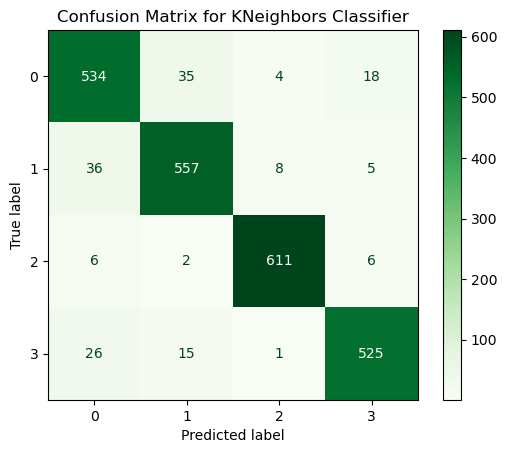

In [46]:
# Making a Confusion Matrix for the Model
KNN_confusion = confusion_matrix(y_test, best_knn_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=KNN_confusion)
disp.plot(cmap='Greens')
disp.ax_.set_title("Confusion Matrix for KNeighbors Classifier")
plt.show()

#### Confusion Matrix Summary for KNeighbors Classifier

#### True Positives (Diagonal Elements):
- **Snowy:** 534 instances were correctly predicted as snowy.
- **Cloudy:** 557 instances were correctly predicted as cloudy.
- **Rainy:** 611 instances were correctly predicted as rainy.
- **Sunny:** 525 instances were correctly predicted as sunny.

#### False Positives (Off-Diagonal Elements):
- **Snowy:**
  - 35 misclassified as cloudy.
  - 4 misclassified as rainy.
  - 18 misclassified as sunny.
- **Cloudy:**
  - 36 misclassified as snowy.
  - 8 misclassified as rainy.
  - 5 misclassified as sunny.
- **Rainy:**
  - 6 misclassified as snowy.
  - 2 misclassified as cloudy.
  - 6 misclassified as sunny.
- **Sunny:**
  - 26 misclassified as snowy.
  - 15 misclassified as cloudy.
  - 1 misclassified as rainy.

#### Observations:
- The classifier performs best for the **rainy** class, with the highest number of correct predictions (611).
- Misclassification is most prominent for **sunny misclassified as snowy (26)** and **cloudy misclassified as snowy (36)**.
- Overall, the KNeighbors Classifier exhibits good performance, with most predictions focused on the diagonal.

---

<a id="evaluation"></a> 

## **4.6 Model Evaluation and Comparison**  

Assess the models using performance metrics and visual tools.

Based on the evaluation of the Gradient Boosting Classifier (GB), Logistic Regression (LR), and K-Nearest Neighbors (KNN) models for predicting weather types, the Gradient Boosting Classifier proves to be the most effective and balanced model for classification. Here are the final observations:

#### Overall Performance:

- The **GB model** achieves the highest test set accuracy (95.35%) and an average cross-validation score of 0.9594, demonstrating strong consistency across training, validation, and testing phases.
- The **LR model** shows a slightly lower test set accuracy (92.84%) with an average cross-validation score of 0.9347, making it reliable but less optimal than GB.
- The **KNN model** achieves a test set accuracy of 93.21% and an average cross-validation score of 0.9376, performing better than LR but still slightly behind GB.

#### Class-Specific Metrics:

**Snowy Class:**

- GB achieves the best balance between precision (0.9640) and recall (0.9856), leading to the highest F1-score (0.9749), ensuring accurate identification of snowy conditions with minimal false positives.
- KNN has the highest precision (0.9791) but slightly lower recall (0.9776), making it effective but not as well-balanced as GB.
- LR also performs well, with an F1-score of 0.9698, but has slightly lower recall (0.9776) than GB.

**Cloudy Class:**

- GB maintains strong performance with a precision of 0.9396 and recall of 0.9205, resulting in a well-balanced F1-score of 0.9299.
- KNN slightly outperforms LR in this category, with an F1-score of 0.8952 compared to LR’s 0.8846.

**Rainy Class:**

- GB has the highest F1-score (0.9462), ensuring reliable identification of rainy weather while minimizing misclassifications.
- LR and KNN perform similarly in this category, with LR achieving a 0.9237 F1-score and KNN slightly ahead at 0.9168.

**Sunny Class:**

- GB maintains high accuracy in predicting sunny weather, with a precision of 0.9764 and recall of 0.9488, leading to an F1-score of 0.9624.
- LR and KNN follow closely, with LR achieving an F1-score of 0.9335 and KNN slightly higher at 0.9366.

#### Error Analysis:

- The GB model has the lowest number of false positives and false negatives across all classes, ensuring a more reliable classification.
- The KNN model slightly struggles with misclassifications in the cloudy and sunny classes, leading to higher false positives.
- The LR model has the highest false positives in the snowy and rainy categories, making it slightly less effective than GB and KNN.

In this project, we successfully developed a machine learning model to classify weather types based on meteorological data. Through exploratory data analysis, feature engineering, and model evaluation, the **Gradient Boosting Classifier emerged as the most effective model**, demonstrating high accuracy, strong generalization ability, and balanced performance across all weather types. Logistic Regression and KNN also provided strong results but were slightly outperformed by Gradient Boosting in terms of class-specific metrics and overall stability. 

#### I appreciate your time! Please feel free to share any feedback or insights!